# 0. Importar bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Importar e carregar o dataset a ser utilizado

In [4]:
df = pd.read_csv('ds_salaries.csv')

# 2. Introdução

# <b>Análise inicial sobre o conjunto de dados</b>
<b>Essa análise de dados foi realizada a partir de um conjunto de dados coletados no site 'www.kaggle.com'.</b>

A construção do dashboard e o inicio da análise, se deu ao entender um pouco mais sobre os profissionais da área de dados e prever aumentos de cargos e salarios ao longos dos anos. E também as perguntas que citarei logo a baixo e demais correlações que foram identificadas em uma análise bivariada.<br>

1. <strong>Existe correlação entre o nível de experiencia e o salário pago?
2. <strong>Existe diferença entre o salário em empresas de diferentes portes?
3. <strong>Como é a distribuição geográfica dos profissionais de dados ao longo dos anos?
4. <strong>Como foi o crescimento dos profissionais das áreas de dados nos últimos 4 anos?
5. <strong>Existe correlação entre o início da pandemia e o aumento nos profissionais de dados?
6. <strong>Quais são os profissionais mais bem pagos na área de dados?
   <br><br>
# <b>Segundo o fornecedor do dataset:</b>
- <strong> A ciência de dados ajuda a prever tendências e resultados futuros com base em dados históricos, auxiliando no planejamento proativo.
- <strong> Ao analisar processos e fluxos de trabalho, a ciência de dados identifica áreas para otimização, melhorando a eficiência geral.
- <strong> A ciência de dados alimenta a inovação ao descobrir padrões, relacionamentos e oportunidades que podem não ser aparentes através dos métodos tradicionais.
- <strong> As empresas usam a ciência de dados para personalizar produtos, serviços e experiências do usuário, aumentando a satisfação do cliente.
- <strong> Ao otimizar processos e recursos, a ciência de dados pode levar a economias significativas de custos para as empresas.
- <strong> A ciência de dados ajuda a otimizar as operações da cadeia de suprimentos, reduzindo custos e melhorando a eficiência geral da logística.
- <strong> A ciência de dados facilita um ciclo de melhoria contínua, fornecendo feedback e insights para o refinamento contínuo de estratégias e processos.<br><br>

# <b>Recursos do conjunto de dados:</b>

work_year: O ano em que o salário foi pago.

experience_level: O nível de experiência profissional durante o ano

Employment_type: o tipo de emprego para a função

job_title: O trabalho em que você trabalhou durante o ano.

salário: O valor bruto total do salário pago.

salário_currency: A moeda do salário pago como um código de moeda ISO 4217.

salarioinusd: O salário em dólares americanos

employee_residence: o país de residência principal do funcionário durante o ano de emprego como um código de país ISO 3166.

remote_ratio: A quantidade total de trabalho realizado remotamente

company_location: O país da sede do empregador ou filial contratante

company_size: O número médio de pessoas que trabalharam para a empresa durante o ano

# 3. Visualizando as primeiras linhas do conjunto de dados

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# 4. Conhecendo um pouco mais o conjunto de dados.

In [6]:
# A quantidade de linhas e colunas no conjunto de dados
df.shape

(3755, 11)

In [7]:
# Os tipos de cada dados nas colunas
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
# Nomenclatura das colunas existentes 
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
# Informações sobre, foi verificado que não possui valores não nulos ou missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
# Informações relevantes sobre dados estatisticos e matematicos
df.describe().round(2)
# Os valores foram arredondados

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [11]:
# Checagem de valores nulos
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
# Contagem dos titulos de cargos
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [13]:
# Contagem dos níveis de experiência

# SE = SENIOR LEVEL = SENIOR
# MI - MID LEVEL = PLENO 
# EN = ENTRY LEVEL = JUNIOR
# EX = EXECUTIVE LEVEL = EXECUTIVO
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [14]:
# Contagem de países das organizações analisadas
df['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [15]:
# Contagem dos portes das organizações existentes no dataset

# M = MEDIUM = MÉDIO
# L = LARGE = GRANDE
# S = SMALL = PEQUENO
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [16]:
# Aumento no numero de profissionais na área de dados cresceu exorbitantemente no inicio da pandemia

# Mostrando assim um aumento elevado no número de profissionais da área em relação ao início da pandemia.
df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [17]:
# Tipo de "contrato" de trabalho dos colaboradores.
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

# 5. Análise de gráficos

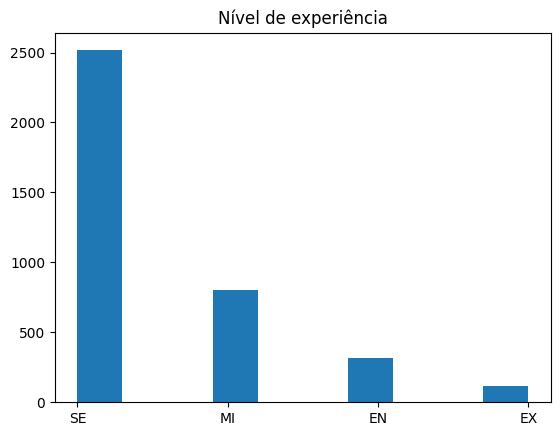

In [18]:
# Gráfico representanto os niveis de senioridade dos profissionais dos dados, onde a maioria se encontra como nível sênior.
_ = plt.hist(df.experience_level)
_ = plt.title("Nível de experiência")

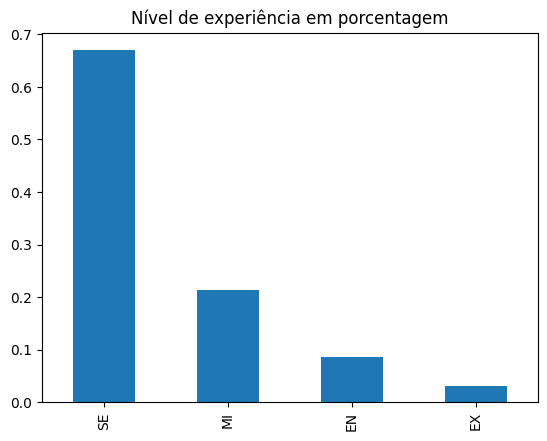

In [19]:
# O gráfico acima representado agora em porcentagem
_ = df.experience_level.value_counts(1).plot.bar()
_ = plt.title("Nível de experiência em porcentagem")

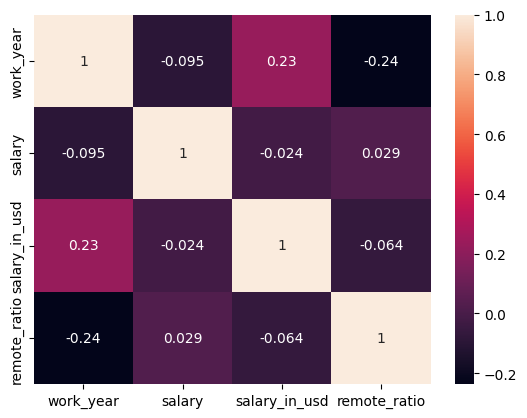

In [20]:
# Identificando as correlações presentes no dataframe
_ = df.corr()
_ = sns.heatmap(df.corr(),annot=True)

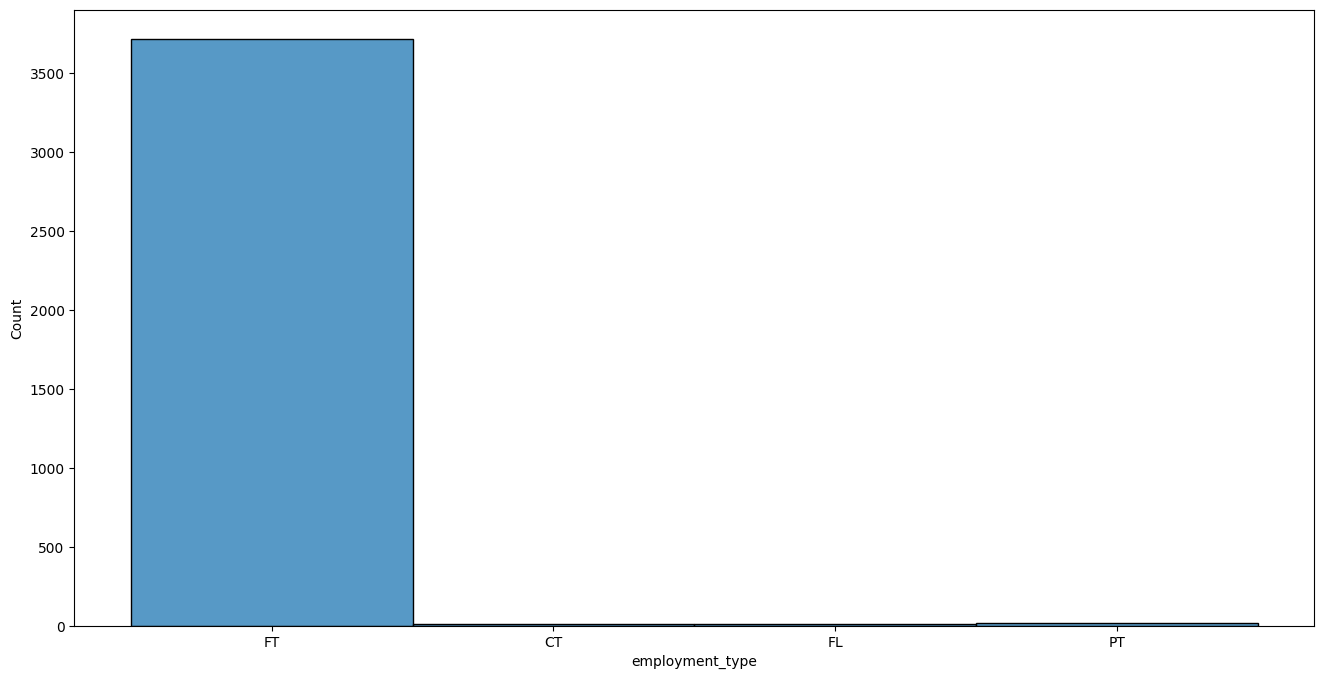

In [21]:
# Aqui conseguimos ter a clareza de que o modelo de trabalho "Full-time" é o maior de forma bem discrepante, sendo acima de 3500 linhas.
# Conforme tambem foi indicado no indice numero 4.
_ = plt.figure(figsize = (16, 8))
_ = sns.histplot(data=df['employment_type'])

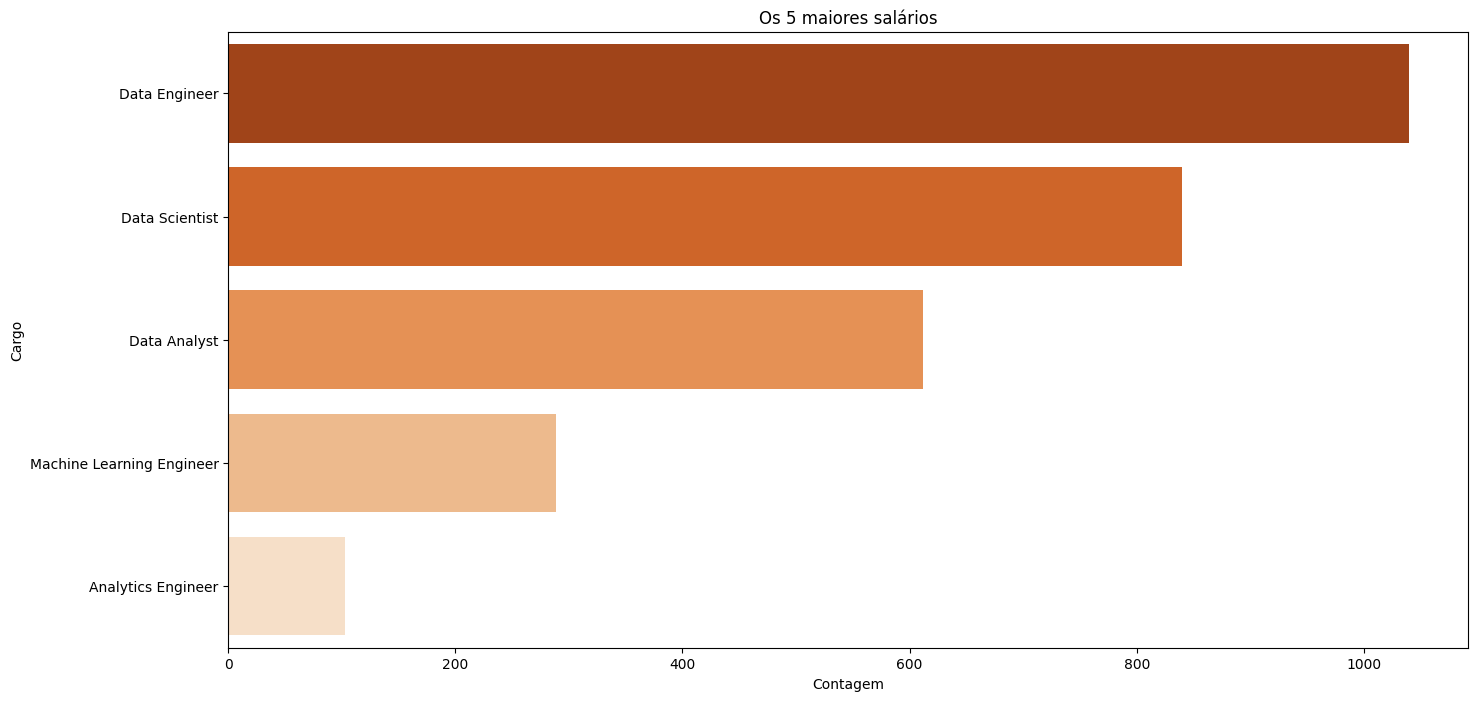

In [22]:
# Com isso podemos visualizar os 5 maiores salários dos profissionais de dados
plt.figure(figsize = (16, 8))

top_jobs = df['job_title'].value_counts().nlargest(5)
_ = sns.barplot(x = top_jobs, y = top_jobs.index, palette='Oranges_r')

plt.xlabel('Contagem')
plt.ylabel('Cargo')
_ = plt.title('Os 5 maiores salários')

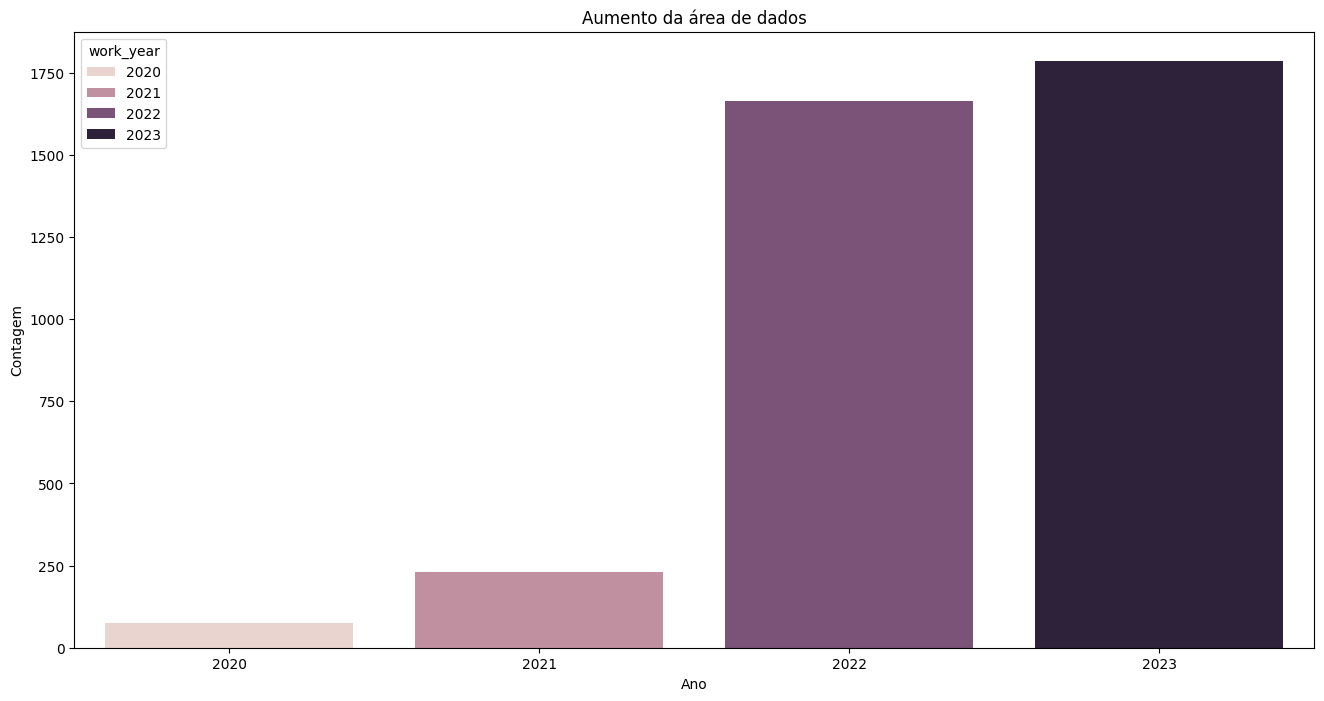

In [23]:
# Para reforçar a ideia do que eu citei no indice 4, a respeito do crescimento da área de dados na pandemia.
plt.figure(figsize = (16,8))
sns.countplot(data = df, x = 'work_year', hue='work_year')
plt.xlabel('Ano')
plt.ylabel('Contagem')
_ = plt.title('Aumento da área de dados')

In [56]:
# Outros gráficos uteis para a análise do dataset
my_report = sv.analyze(df) # Cria o report e atribui valor a ele
my_report.show_html() # Vai exportar esse report em html

NameError: name 'sv' is not defined

# 6. Conclusão

<b>Em resumo, a exploração dos dados neste projeto trouxe informações importantes e uma compreensão mais profunda das características do conjunto de dados. Conseguimos detectar lacunas nos dados e possíveis conexões entre as variáveis. Adicionalmente, empregamos diversas técnicas visuais para apresentar os dados de forma mais expressiva, facilitando a comunicação dos nossos achados de maneira efetiva!</b>